In [174]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import csv
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import linregress
import matplotlib.patches as mpatches


In [75]:
data_path = '/Users/srinidhienaidu/Downloads/Data from LabChart - Sheet1.csv'
roach_data = pd.read_csv(data_path)

In [76]:
roach_data.keys()

Index(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Page No'], dtype='object')

In [77]:
roach_pages = roach_data['Page No']

In [78]:
num_data_pts = []
data_pg_idx = {}

for page in np.arange(4):
    page_num = page + 1
    page_idxs = (np.where(np.array(roach_pages) == page_num)[0])
    data_pg_idx[page] = page_idxs
    num_data_pts.append(page_idxs.shape[0])

# T_PTS = np.min(np.array(num_data_pts))
NUM_PGS = len(data_pg_idx)

In [79]:
NUM_PGS

4

In [80]:
all_tps = {}
for page in range(NUM_PGS):
    num_tps = data_pg_idx[page].shape[0]
    data = np.zeros((4, num_tps))
    indices = data_pg_idx[page][:]
    for channel in np.arange(4):
        key = f'Channel {channel + 1}'
        data[channel] = np.array(roach_data[key])[indices]

    all_tps[f'Page {page + 1}'] = data


In [81]:
colors = ['r', 'mediumblue', 'seagreen', 'deeppink']

labels = ['Left Forewing',
'Right Forewing',
'Left Hindwing',
'Right Hindwing']

Text(0.5, 0.98, 'Transient Amplitude across Experiment Trials')

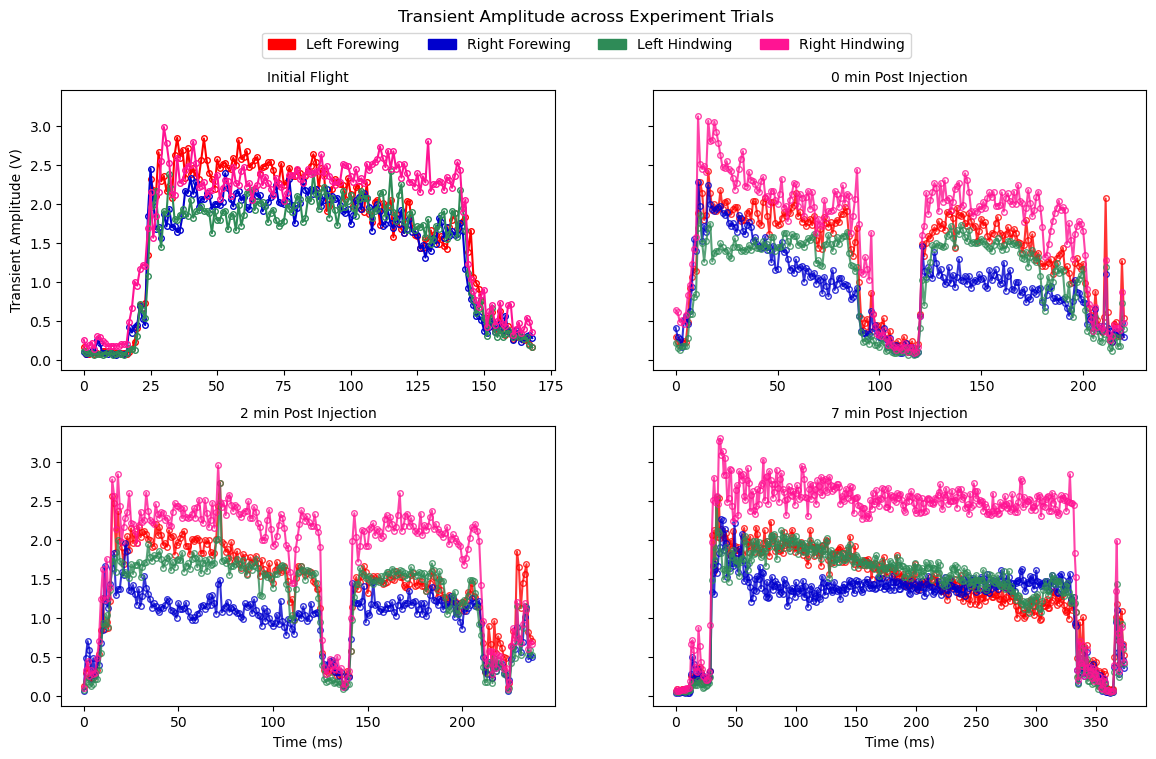

In [234]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey= True)

ax0, ax1, ax2, ax3 = axes.flatten()

for channel in range(4):
    ax0.plot(all_tps[f'Page 1'][channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel], label=labels[channel])
    ax1.plot(all_tps[f'Page 2'][channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel], label=labels[channel], alpha = 0.8)
    ax2.plot(all_tps[f'Page 3'][channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel], label=labels[channel], alpha = 0.8)
    ax3.plot(all_tps[f'Page 4'][channel], marker='o', markersize=4, markerfacecolor='none', color=colors[channel], label=labels[channel], alpha = 0.8)

# ax0.set_title('')
# ax0.set_xlabel('Time (ms)', fontsize = 15)
# ax1.set_xlabel('Time (ms)', fontsize = 15)
ax2.set_xlabel('Time (ms)', fontsize = 10)
ax3.set_xlabel('Time (ms)', fontsize = 10)
ax0.set_ylabel('Transient Amplitude (V)', fontsize = 10)

ax0.set_title('Initial Flight', fontsize = 10)
ax1.set_title('0 min Post Injection', fontsize = 10)
ax2.set_title('2 min Post Injection', fontsize = 10)
ax3.set_title('7 min Post Injection', fontsize = 10)
wing = [
    'Left Forewing', 'Right Forewing', 'Left Hindwing', 'Right Hindwing'
]
# Create legend patches
legend_patches = [
    mpatches.Patch(color=colors[i], label= wing[i]) 
    for i in range(4)
]

# Add an overall legend with specific colors
fig.legend(handles=legend_patches, 
           loc='upper center', 
           ncol=4, 
           bbox_to_anchor=(0.5, 0.96))

fig.suptitle('Transient Amplitude across Experiment Trials', fontsize = 12)

In [136]:
threshold = 0.5
filtered_data = {
    key: [
        np.array([value for value in array if value > threshold])
        for array in arrays
        ]
    for key, arrays in all_tps.items()
}


In [245]:
filtered_data.keys()

dict_keys(['Page 1', 'Page 2', 'Page 3', 'Page 4'])

In [261]:
summary_stats = {}
for exp, channels in filtered_data.items():
    summary_stats[exp] = {
        f"channel_{i+1}": {"mean": np.mean(channel), "std": np.std(channel)}
        for i, channel in enumerate(channels)
    }

# Display summary stats
for exp, stats in summary_stats.items():
    print(f"\n{exp}:")
    for channel, values in stats.items():
        print(f"  {channel} -> Mean: {values['mean']:.2f}, Std: {values['std']:.2f}")


Page 1:
  channel_1 -> Mean: 2.06, Std: 0.52
  channel_2 -> Mean: 1.82, Std: 0.41
  channel_3 -> Mean: 1.81, Std: 0.39
  channel_4 -> Mean: 2.13, Std: 0.56

Page 2:
  channel_1 -> Mean: 1.59, Std: 0.40
  channel_2 -> Mean: 1.14, Std: 0.38
  channel_3 -> Mean: 1.35, Std: 0.28
  channel_4 -> Mean: 1.94, Std: 0.49

Page 3:
  channel_1 -> Mean: 1.56, Std: 0.42
  channel_2 -> Mean: 1.13, Std: 0.21
  channel_3 -> Mean: 1.50, Std: 0.31
  channel_4 -> Mean: 2.03, Std: 0.51

Page 4:
  channel_1 -> Mean: 1.55, Std: 0.36
  channel_2 -> Mean: 1.43, Std: 0.19
  channel_3 -> Mean: 1.62, Std: 0.27
  channel_4 -> Mean: 2.47, Std: 0.41


In [263]:
percent_changes = {}

for i in range(4):
    initial_mean = np.mean(filtered_data["Page 2"][i])
    final_mean = np.mean(filtered_data["Page 4"][i])
    print(initial_mean, final_mean)
    percent_change = ((final_mean - initial_mean) / initial_mean) * 100
    percent_changes[f"channel_{i+1}"] = percent_change

# Display percentage changes
print("\nPercentage Change from Experiment 1 to Experiment 4:")
for channel, change in percent_changes.items():
    print(f"{channel}: {change:.2f}%")

1.5864436464088398 1.5534422712933753
1.1446734104046243 1.429031935483871
1.352077976190476 1.6182464743589744
1.9404820652173915 2.4685849529780564

Percentage Change from Experiment 1 to Experiment 4:
channel_1: -2.08%
channel_2: 24.84%
channel_3: 19.69%
channel_4: 27.22%


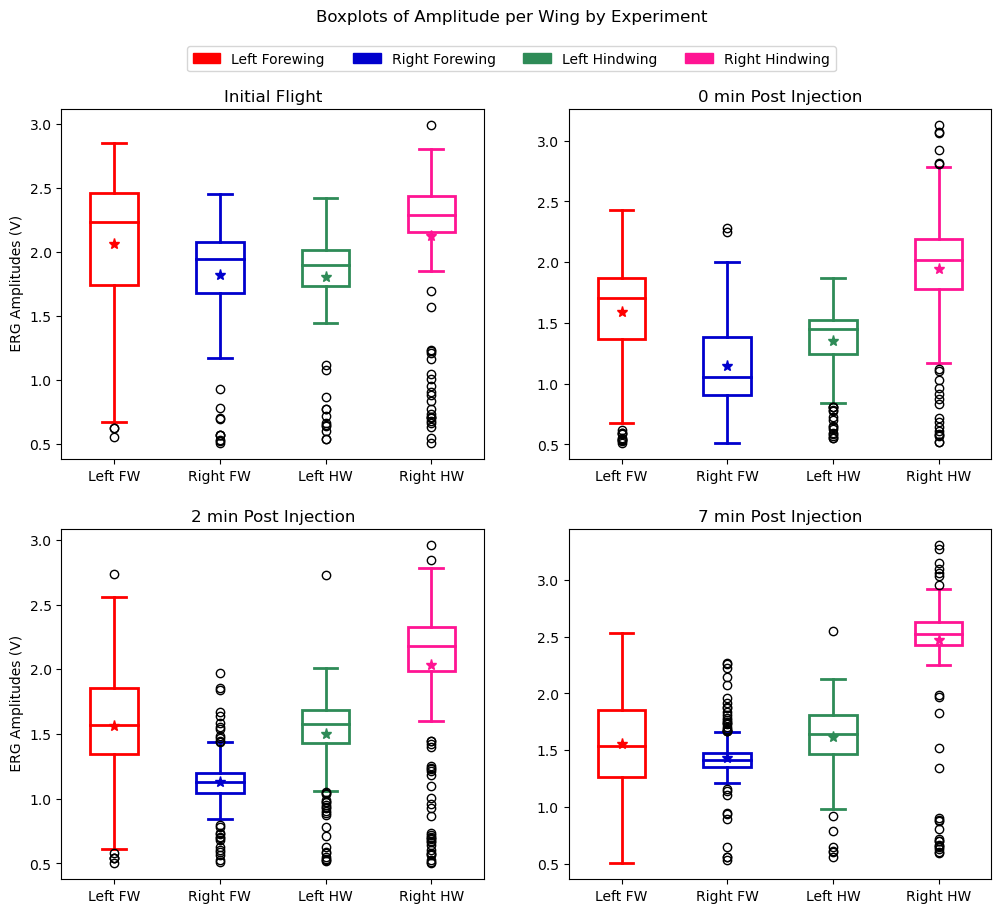

In [265]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  

keys = [
    'Page 1', 'Page 2', 'Page 3', 'Page 4'
]

label = [
    'Initial Flight', '0 min Post Injection', '2 min Post Injection', '7 min Post Injection'

]

colors = ['r', 'mediumblue', 'seagreen', 'deeppink']

for ax_idx, ax in enumerate(axes):
    data = filtered_data[keys[ax_idx]]
    box = ax.boxplot(data, patch_artist=True)

    for i, color in enumerate(colors):
        # Customize boxes
        box['boxes'][i].set_edgecolor(color)
        box['boxes'][i].set_linewidth(2)
        box['boxes'][i].set_facecolor('none')  # Transparent center

        # Customize whiskers
        for whisker in box['whiskers'][2 * i:2 * i + 2]:
            whisker.set_color(color)
            whisker.set_linewidth(2)

        # Customize caps
        for cap in box['caps'][2 * i:2 * i + 2]:
            cap.set_color(color)
            cap.set_linewidth(2)

        # Customize medians
        box['medians'][i].set_color(color)
        box['medians'][i].set_linewidth(2)

        mean_value = data[i].mean()
        ax.plot(i + 1, mean_value, marker='*', color=color, markersize=8)
    # Add labels and title
    ax.set_xticks([1, 2, 3, 4], ['Left FW', 'Right FW', 'Left HW', 'Right HW'])
    ax.set_title(label[ax_idx])

    if ax_idx == 2:
        ax.set_ylabel(" ERG Amplitudes (V)")
        # ax.set_xlabel("Channel")

    if ax_idx == 0:
        ax.set_ylabel(" ERG Amplitudes (V)")
        
# fig.legend(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4'], 
#            loc='upper center', 
#            ncol=4, 
#            bbox_to_anchor=(0.5, 0.95))


# Define custom colors for each channel
# colors = ['blue', 'green', 'orange', 'red']
wing = [
    'Left Forewing', 'Right Forewing', 'Left Hindwing', 'Right Hindwing'
]
# Create legend patches
legend_patches = [
    mpatches.Patch(color=colors[i], label= wing[i]) 
    for i in range(4)
]


# Add an overall legend with specific colors
fig.legend(handles=legend_patches, 
           loc='upper center', 
           ncol=4, 
           bbox_to_anchor=(0.5, 0.95))

fig.suptitle('Boxplots of Amplitude per Wing by Experiment')

plt.show()
